# Stratégie ESG quantitative  (optimisation d'un ou plusieurs critères ESG)

Etape1: Exclusion normatives et sectorielle
    - Exclusion des entreprises non signataires de l'UNGC ou ne respectant pas l'UNGC
    - Exclusion des entreprises pratiquant des activités controversées

Etape2: Intégration des critères ESG
    - Identification des entreprises du CAC40 ESG et des notes E, S et G y afférentes
    - Détermination des médianes des notes E, S et G de ces entreprises. Celles-ci constituerons des benchmarks
    - Filtrer parmi les entreprises retenues à l'étape 1, celles dont les scores E, S et G sont supérieurs aux benchmarks



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
!pip install openpyxl


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Ici on veut déterminer le score ESG du CAC40 ESG. Pour ce faire, nous allons identifier les entreprise qui composent cet indice, puis déterminer les scores E, S et G moyens. Ceux-ci serviront de seuils de scores pour les entreprises qui constitueront notre portefeuille. Procédant de cette manière le score ESG du portefeuille sera au moins égal à celui du CAC 40 ESG.0

Qu’est-ce que le CAC 40 ESG ?
En 2021, Euronext a annoncé le lancement du CAC 40 ESG, conçu pour identifier les 40 entreprises du CAC Large 60 présentant les meilleures pratiques en matière de critères ESG. Le CAC 40 ESG est devenu ainsi le premier indice ESG national d'Euronext. En partenariat avec Vigeo Eiris (V.E), une filiale de Moody’s, Euronext a évalué les pratiques ESG des entreprises pour composer cet indice (une note sur 100 sur 38 critères, méthodologie à retrouver ici). La méthodologie de l'indice est alignée avec le label ISR français et les principes du Pacte Mondial des Nations Unies, incluant des critères de classement relatifs "Best-in-class". Cela veut dire que les entreprises ayant les meilleurs scores parmi le CAC Large 60 sont sélectionnées, sans que ces secteurs n’aient forcément de contribution directe à la transition. Ensuite, les filtres d'exclusions sont appliqués. Concrètement, les entreprises impliquées dans le charbon (+5% d’activités dans les énergies fossiles), les armes controversées ou le tabac (+10% de l’activité) sont exclues, pour donner quelques exemples.

https://blog.goodvest.fr/articles/le-cac-40-esg-un-pas-vers-linvestissement-durable

In [3]:
score_esg = pd.read_excel('details_ESG.xlsx')
univers = pd.read_excel("Univers d'investissement_Monde.xlsx")

univers = univers.merge(score_esg[["ISIN","ESG ENV", "ESG SOCscore", "ESG GOV", "Global"]], on="ISIN", how="inner")
print("Nombre d'entreprises restantes:\t",len(univers["ISIN"].unique()))

Nombre d'entreprises restantes:	 4880


Récupération des entreprises du CAC 40 ESG.

In [4]:
cac40_esg = pd.read_csv("CAC40 ESG.csv")
cac40_esg = cac40_esg.merge(score_esg, on="ISIN", how="inner" )
cac40_esg = cac40_esg[["ISIN","ESG ENV", "ESG SOCscore", "ESG GOV", "Global"]]

<Axes: >

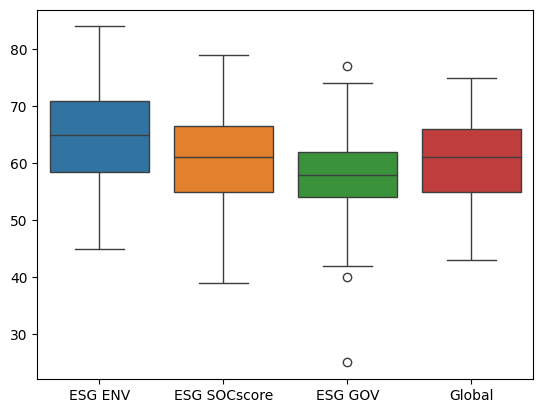

In [5]:
cac40_esg.describe()
sns.boxplot(cac40_esg)

In [6]:
# Exclusion normative
# Exclusion des entrprises non signataires de l'UNGC et de celle qui ne respectent pas l'UNGC

In [7]:
un_global = pd.read_excel('UN Global Compact.xlsx')
un_global = un_global[(un_global["Signataire de l\'UNGC"]=="Oui")&(un_global["Non-Respect de l\'UNGC"]=="Non")]
univers = univers.merge(un_global[["ISIN"]], on="ISIN", how="inner")

print("Nombre d'entreprises restantes:\t",len(univers["ISIN"].unique()))

Nombre d'entreprises restantes:	 1119


In [8]:
# Exclusion des entreprises pratiquent des activités controversées

In [9]:
act_controverses = pd.read_excel('Activités Controversées.xlsx')

In [10]:
controverse = ['Alcool',
 'Activités nuisant au bienêtre animal (tests, fourrure, etc)',
 'Produits chimiques controversés',
 "Jeux d'argents et de hasard",
 'Organismes genertiquement modifiés',
 'Prêts usuriers',
 'Energie Nucléaire',
 'Divertissements pour Adultes',
 'Medecine reproductive',
 'Tabac',
 'Energies fossiles (Overall)',
 'Charbon',
 'Fossile non conventionnel',
 'Armes à feu civiles',
 'Matériel Militaire',
 'Armement controversé (Armes de destruction massive)']

In [11]:
act_controverses = act_controverses[(act_controverses[controverse] == "Non").all(axis=1)]
univers = univers.merge(act_controverses[["ISIN"]], on="ISIN", how="inner")

print("Nombre d'entreprises restantes:\t",len(univers["ISIN"].unique()))

Nombre d'entreprises restantes:	 788


In [12]:
## Prise en compte des critères ESG via une stratégie best in univers
## On retient les entreprises qui ont des scores E, S, et G supérieurs à la médiane des scores E, S, G des entreprises du  CAC40 ESG

In [13]:
seuils_esg = cac40_esg[["ESG ENV", "ESG SOCscore", "ESG GOV"]].quantile(0.5)

In [14]:
univers = univers[(univers["ESG ENV"]>=seuils_esg["ESG ENV"])&
                  (univers["ESG SOCscore"]>=seuils_esg["ESG SOCscore"])&
                  (univers["ESG GOV"]>=seuils_esg["ESG GOV"])
                ]

In [15]:
print("Nombre d'entreprises restantes:\t",len(univers["ISIN"].unique()))


Nombre d'entreprises restantes:	 23


In [16]:
univers.describe()

,ESG ENV,ESG SOCscore,ESG GOV,Global
count,23.000000,23.000000,23.000000,23.000000
mean,73.217391,67.913043,66.043478,68.347826
std,6.775333,5.509604,6.108699,3.549759
min,65.000000,61.000000,58.000000,61.000000
25%,67.000000,63.500000,60.500000,66.000000
50%,72.000000,67.000000,65.000000,68.000000
75%,77.500000,72.000000,71.000000,70.000000
max,91.000000,80.000000,77.000000,76.000000


In [17]:
nombre_entreprises_par_zone = univers.groupby('Country')['Title'].count().reset_index(name='NombreEntreprises')

# Calcul du taux d'entreprises par zone d'activité
nombre_total_entreprises = nombre_entreprises_par_zone['NombreEntreprises'].sum()
nombre_entreprises_par_zone['TauxEntreprises'] = nombre_entreprises_par_zone['NombreEntreprises'] / nombre_total_entreprises

# Afficher le résultat
print(nombre_entreprises_par_zone)

       Country  NombreEntreprises  TauxEntreprises
0    Australia                  1         0.043478
1      Finland                  1         0.043478
2       France                 12         0.521739
3      Germany                  1         0.043478
4        Italy                  3         0.130435
5  Netherlands                  2         0.086957
6        Spain                  3         0.130435


In [18]:
univers.head()

,ISIN,Bloomberg Ticker,Title,Sector zone,Country,Zone,ESG ENV,ESG SOCscore,ESG GOV,Global
6,NL0011540547,ABN,Abn Amro Bank,Diversified Banks,Netherlands,EUR,76,67,58,66
15,FR0010340141,ADP,Aeroports de Paris,Transport & Logistics,France,EUR,77,64,59,64
19,XS1046325640,NaN,Agence Francaise de Developpement,Specific Purpose Banks & Agencies,France,EUR,67,80,70,74
38,FR0004125920,AMUN,Amundi,Financial Services - General,France,EUR,82,70,63,70
71,FR0000120628,CS,Axa,Insurance,France,EUR,81,63,72,69


In [19]:
nombre_entreprises_par_secteur = univers.groupby('Sector zone')['Title'].count().reset_index(name='NombreEntreprises')

# Calcul du taux d'entreprises par zone d'activité
nombre_total_entreprises = nombre_entreprises_par_secteur['NombreEntreprises'].sum()
nombre_entreprises_par_secteur['TauxEntreprises'] = nombre_entreprises_par_secteur['NombreEntreprises'] / nombre_total_entreprises

# Afficher le résultat
print(nombre_entreprises_par_secteur)

                                      Sector zone  NombreEntreprises  \
0                                     Automobiles                  2   
1                               Diversified Banks                  3   
2                        Electric & Gas Utilities                  2   
3                 Electric Components & Equipment                  1   
4                    Financial Services - General                  1   
5                Financial Services - Real Estate                  2   
6   Financial Services - Real Estate Asia Pacific                  1   
7                         Forest Products & Paper                  1   
8                                       Insurance                  1   
9                          Software & IT Services                  1   
10              Specific Purpose Banks & Agencies                  2   
11                             Telecommunications                  2   
12                          Transport & Logistics               

In [20]:
univers['Zone']

6      EUR
15     EUR
19     EUR
38     EUR
71     EUR
117    EUR
172    EUR
175    EUR
201    EUR
333    EUR
389    EUR
438    EUR
539    EUR
558    EUR
616    EUR
632    EUR
633    EUR
658    EUR
661    EUR
691    EUR
706    EUR
740    EUR
741     AP
Name: Zone, dtype: object

In [21]:
nombre_entreprises_par_zone = univers.groupby('Zone')['Title'].count().reset_index(name='NombreEntreprises')

# Calcul du taux d'entreprises par zone d'activité
nombre_total_entreprises = nombre_entreprises_par_zone['NombreEntreprises'].sum()
nombre_entreprises_par_zone['TauxEntreprises'] = nombre_entreprises_par_zone['NombreEntreprises'] / nombre_total_entreprises

# Afficher le résultat
print(nombre_entreprises_par_zone)

  Zone  NombreEntreprises  TauxEntreprises
0   AP                  1         0.043478
1  EUR                 22         0.956522


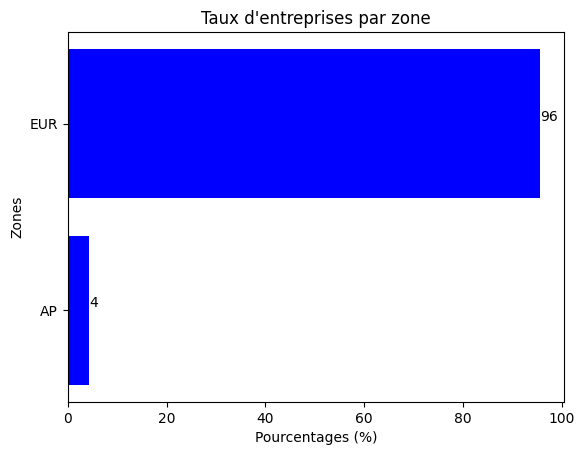

In [22]:
# Create a bar plot
plt.barh(nombre_entreprises_par_zone['Zone'], nombre_entreprises_par_zone['TauxEntreprises']*100, color='blue')
for index, value in enumerate(nombre_entreprises_par_zone['TauxEntreprises']*100):
    plt.text( value,index, str(round(value)), ha='left', va='bottom')
# Add labels and title
plt.ylabel('Zones')
plt.xlabel('Pourcentages (%)')
plt.title('Taux d\'entreprises par zone')
plt.show()


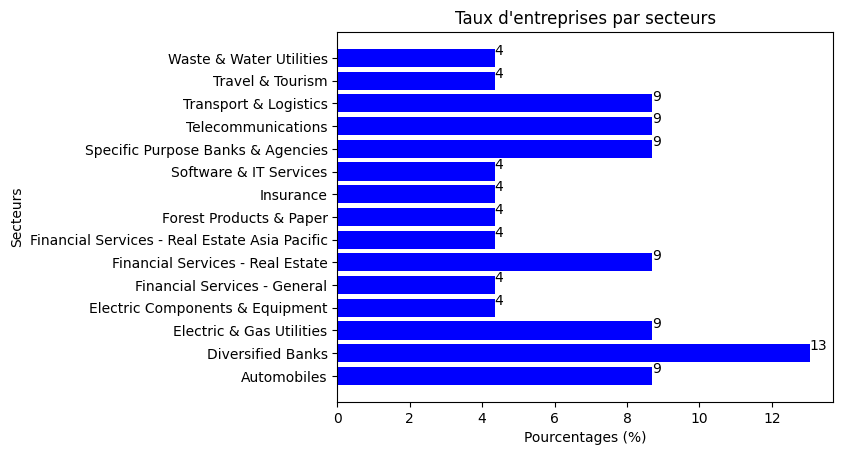

In [23]:
plt.barh(nombre_entreprises_par_secteur['Sector zone'], nombre_entreprises_par_secteur['TauxEntreprises']*100, color='blue')
for index, value in enumerate(nombre_entreprises_par_secteur['TauxEntreprises']*100):
    plt.text( value,index, str(round(value)), ha='left', va='bottom')
# Add labels and title
plt.ylabel('Secteurs')
plt.xlabel('Pourcentages (%)')
plt.title('Taux d\'entreprises par secteurs')
plt.show()

In [24]:
univers['Title']

6                              Abn Amro Bank
15                        Aeroports de Paris
19         Agence Francaise de Developpement
38                                    Amundi
71                                       Axa
117                        Caisse des Dépôts
172                    Cooperatieve Rabobank
175                                  Covivio
201                         Deutsche Telekom
333                           Indra Sistemas
389                                 La Poste
438                                 Michelin
539                              Pirelli & C
558                            Red Electrica
616          Siemens Gamesa Renewable Energy
632                                     SNCF
633                         Societe Generale
658                               Stora Enso
661                                     Suez
691                           Telecom Italia
706                                    Terna
740                Unibail-Rodamco-Westfield
741    Uni

In [25]:
univers = univers.sort_values(by='Global',ascending = False)

In [26]:
univers['ponderation'] = 100 * univers['Global']/np.sum(univers['Global'])

In [27]:
univers[['Title','ponderation']]

,Title,ponderation
389,La Poste,4.834606
632,SNCF,4.707379
19,Agence Francaise de Developpement,4.707379
117,Caisse des Dépôts,4.580153
175,Covivio,4.516539
38,Amundi,4.452926
661,Suez,4.452926
741,Unibail-Rodamco-Westfield (Australia),4.389313
71,Axa,4.389313
740,Unibail-Rodamco-Westfield,4.389313


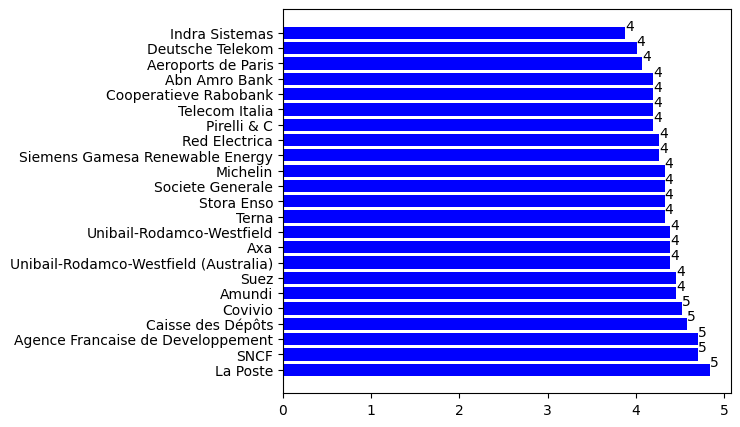

In [28]:
plt.barh(univers['Title'], univers['ponderation'], color='blue')
for index, value in enumerate(univers['ponderation']):
    plt.text( value,index, str(round(value)), ha='left', va='bottom')
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)
plt.show()